In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings
import os

%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [71]:
data1 = pd.read_excel('5-4-1. 청소년지역아동센터 운영(연도별 지역아동센터 수).xlsx',header=1, index_col=0)
data2 = pd.read_excel('5-4-2. 청소년지역아동센터 운영(시도별 지역아동센터 수).xlsx',header=0, index_col=0)
data3 = pd.read_excel('5-4-3. 청소년지역아동센터 운영(연도별 지역아동센터 이용 아동 현황).xlsx',header=1, index_col=0)
data4 = pd.read_excel('5-4-4. 청소년지역아동센터 운영(연도별 지역아동센터 지원 규모 및 운영 현황).xlsx',header=1, index_col=0)

In [72]:
data5 = pd.read_csv('보건복지부_지역아동센터 현황.csv',encoding='euc-kr')

data5 출처 : https://www.data.go.kr/data/15004404/fileData.do?recommendDataYn=Y

In [74]:
data5

,구분,시설수,일일이용아동_미취학,일일이용아동_초등학교저학년,일일이용아동_초등학교고학년,일일이용아동_중학생,일일이용아동_고등학생,일일이용아동_학교밖,일일이용아동_기타,종사자 현황_시설장,종사자 현황_생활복지사
0,2006,2029,4133,25149,21426,6846,1095,103,420.0,2019,2961
1,2007,2618,4127,32867,28177,9224,1413,104,317.0,2618,3440
2,2008,3013,4585,35972,33163,11380,1862,133,196.0,3013,3827
3,2009,3474,4838,39053,38032,13600,2072,331,NaN,3474,4310
4,2010,3690,4376,37865,40233,15075,2346,338,NaN,3690,4352
5,2011,3985,4578,37407,42324,17374,3014,285,NaN,3985,4646
6,2012,4036,4028,38030,42396,20017,3663,223,NaN,4036,4938
7,2013,4061,3714,39293,41025,20817,4006,211,NaN,4061,5121
8,2014,4059,3533,40425,40662,20121,4035,160,NaN,4059,5252
9,2015,4102,3133,42267,40113,19566,4418,164,NaN,4102,5313


# data1 연도별 지역아동센터

In [76]:
# 필요한 데이터만 선택 (첫 번째 열과 나머지 열들)
data1 = data1.iloc[:, :18]  # 첫 번째 열과 2004~2021년까지의 데이터 선택

In [77]:
data1

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
연도,,,,,,,,,,,,,,,,,,
지역아동센터 수,895,1709,2029,2618,3013,3474,3690,3985,4036,4061,4059,4102,4107,4189,4210,4217,4264,4295


In [78]:
# 데이터 변환
data1 = data1.transpose()  # 행과 열을 전환

In [79]:
data1

연도,지역아동센터 수
2004,895
2005,1709
2006,2029
2007,2618
2008,3013
2009,3474
2010,3690
2011,3985
2012,4036
2013,4061


In [80]:
data1.reset_index(inplace=True)  # 인덱스 초기화

In [81]:
data1

연도,index,지역아동센터 수
0,2004,895
1,2005,1709
2,2006,2029
3,2007,2618
4,2008,3013
5,2009,3474
6,2010,3690
7,2011,3985
8,2012,4036
9,2013,4061


In [82]:
data1.columns = ['연도', '지역아동센터 수']  # 열 이름 지정

# 데이터 확인
data1

,연도,지역아동센터 수
0,2004,895
1,2005,1709
2,2006,2029
3,2007,2618
4,2008,3013
5,2009,3474
6,2010,3690
7,2011,3985
8,2012,4036
9,2013,4061


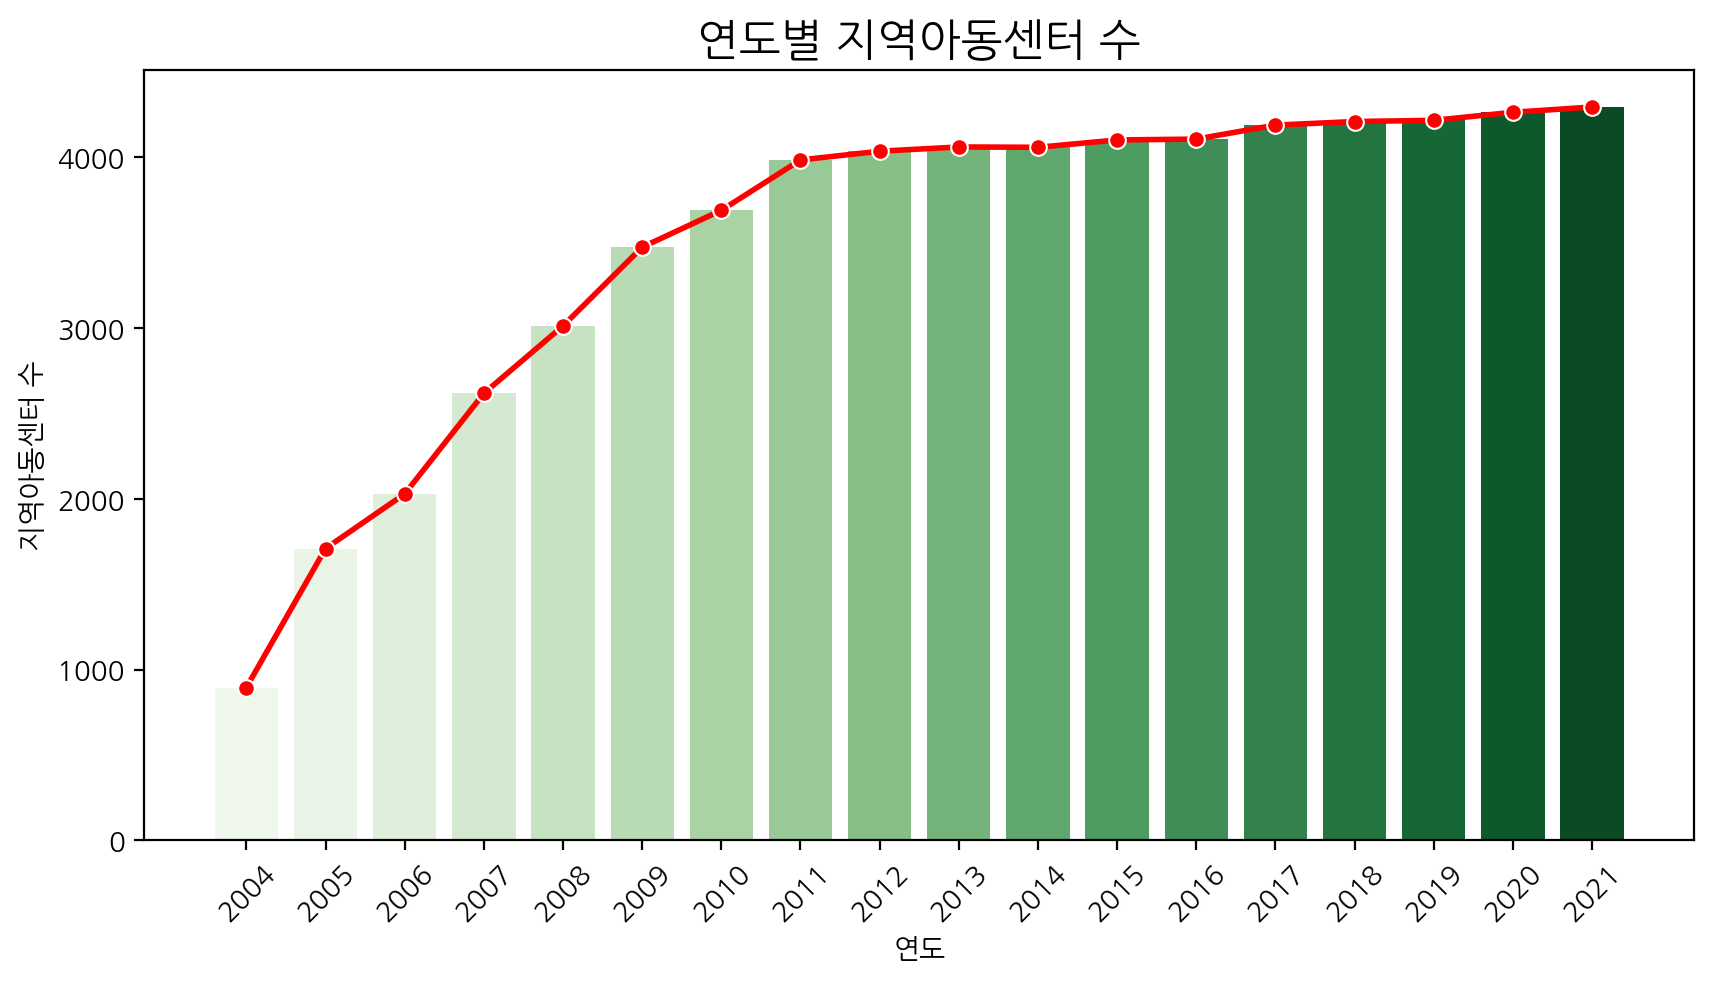

In [83]:
# 연도별 지역아동센터 수 시각화
data1["연도"] = data1["연도"].astype(str)

plt.figure(figsize=(10, 5))
plt.title("연도별 지역아동센터 수", fontsize=16)
sns.barplot(x="연도", y="지역아동센터 수", data=data1, palette='Greens')
sns.lineplot(x="연도", y="지역아동센터 수", data=data1, marker='o', color='red', linewidth=2)
plt.xticks(rotation=45)
plt.show()


# data2 지역별 아동센터

In [85]:
data2 = data2.iloc[:, :17]  # 첫 번째 열과 2004~2021년까지의 데이터 선택
data2 = data2.transpose()  # 행과 열을 전환
data2.reset_index(inplace=True)  # 인덱스 초기화
data2.columns = ['지역', '지역아동센터 수']  # 열 이름 지정
data2

,지역,지역아동센터 수
0,서울,477
1,부산,209
2,대구,201
3,인천,185
4,광주,311
5,대전,140
6,울산,58
7,세종,13
8,경기,803
9,강원,174


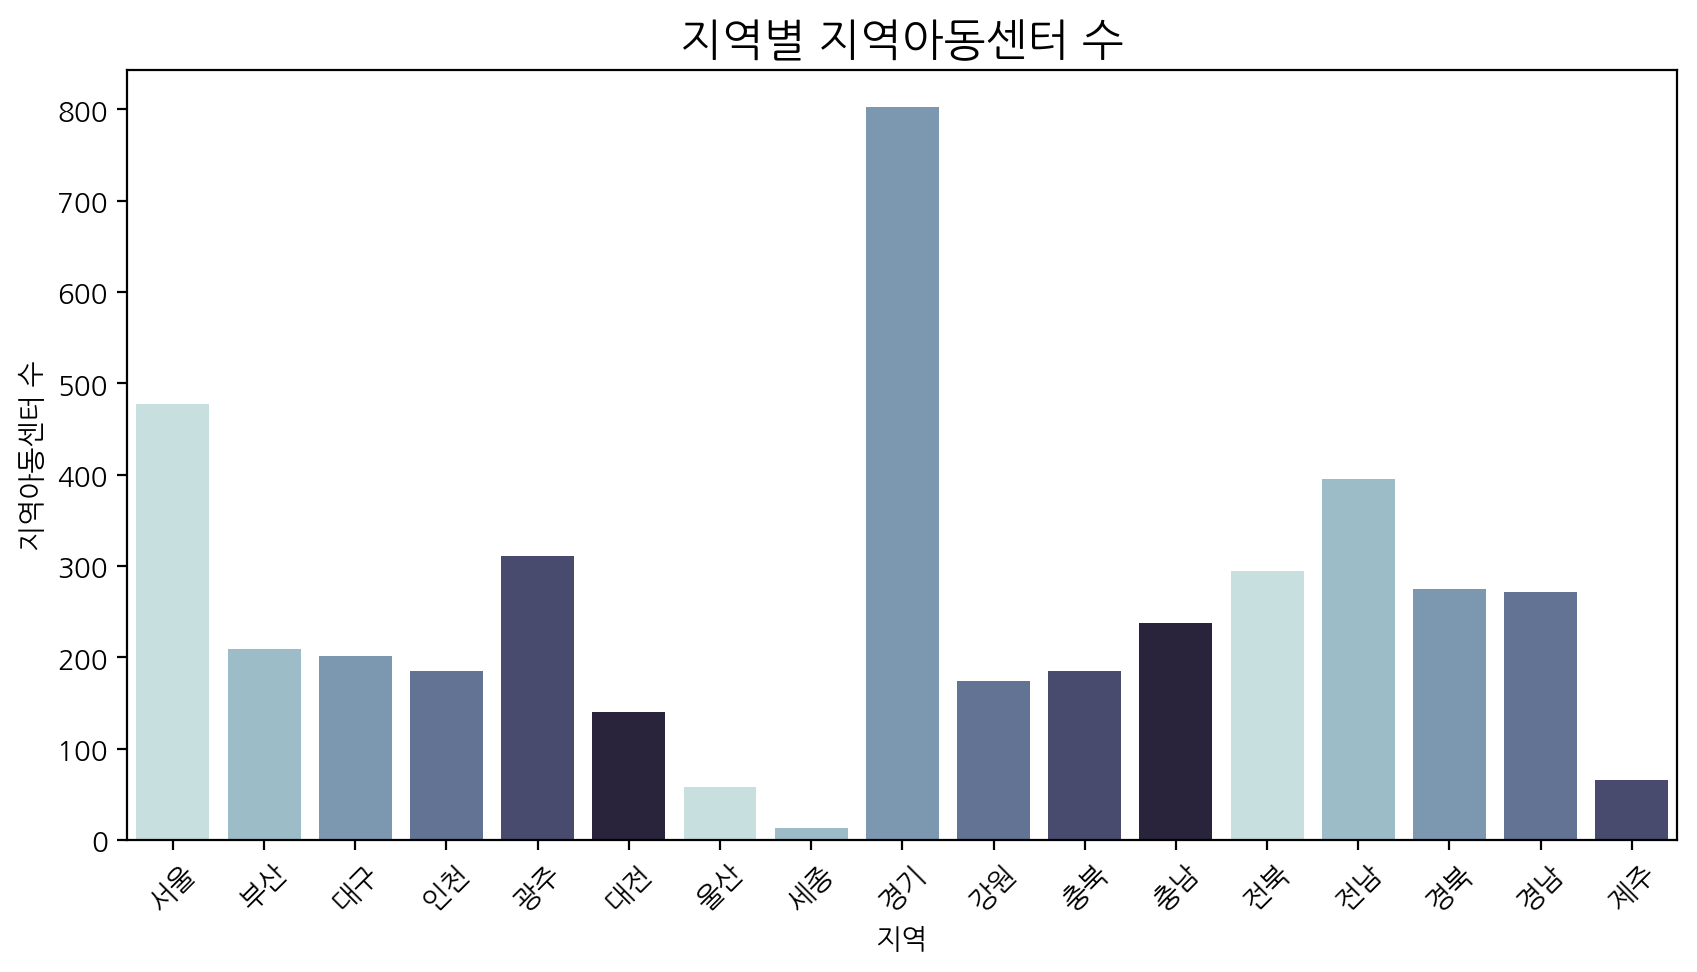

In [86]:
# 지역별 지역아동센터 수 시각화

plt.figure(figsize=(10, 5))
plt.title("지역별 지역아동센터 수", fontsize=16)
sns.barplot(x="지역", y="지역아동센터 수", data=data2, palette=sns.color_palette("ch:start=.2,rot=-.3"))
plt.xticks(rotation=45)
plt.show()

# data3 연도별 아동센터 이용현황

In [88]:
data3

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
연도,,,,,,,,,,,,,,,,,,
지역아동센터 이용 아동 수,23347,43749,58851,76229,87291,97926,100233,104982,108357,109066,108936,109661,106668,108578,109610,108971,106510,106746


In [89]:
data3 = data3.iloc[:, :18]  # 첫 번째 열과 2004~2021년까지의 데이터 선택
data3 = data3.transpose()  # 행과 열을 전환
data3.reset_index(inplace=True)  # 인덱스 초기화
data3.columns = ['연도', '지역아동센터 이용 아동 수']  # 열 이름 지정
data3

,연도,지역아동센터 이용 아동 수
0,2004,23347
1,2005,43749
2,2006,58851
3,2007,76229
4,2008,87291
5,2009,97926
6,2010,100233
7,2011,104982
8,2012,108357
9,2013,109066


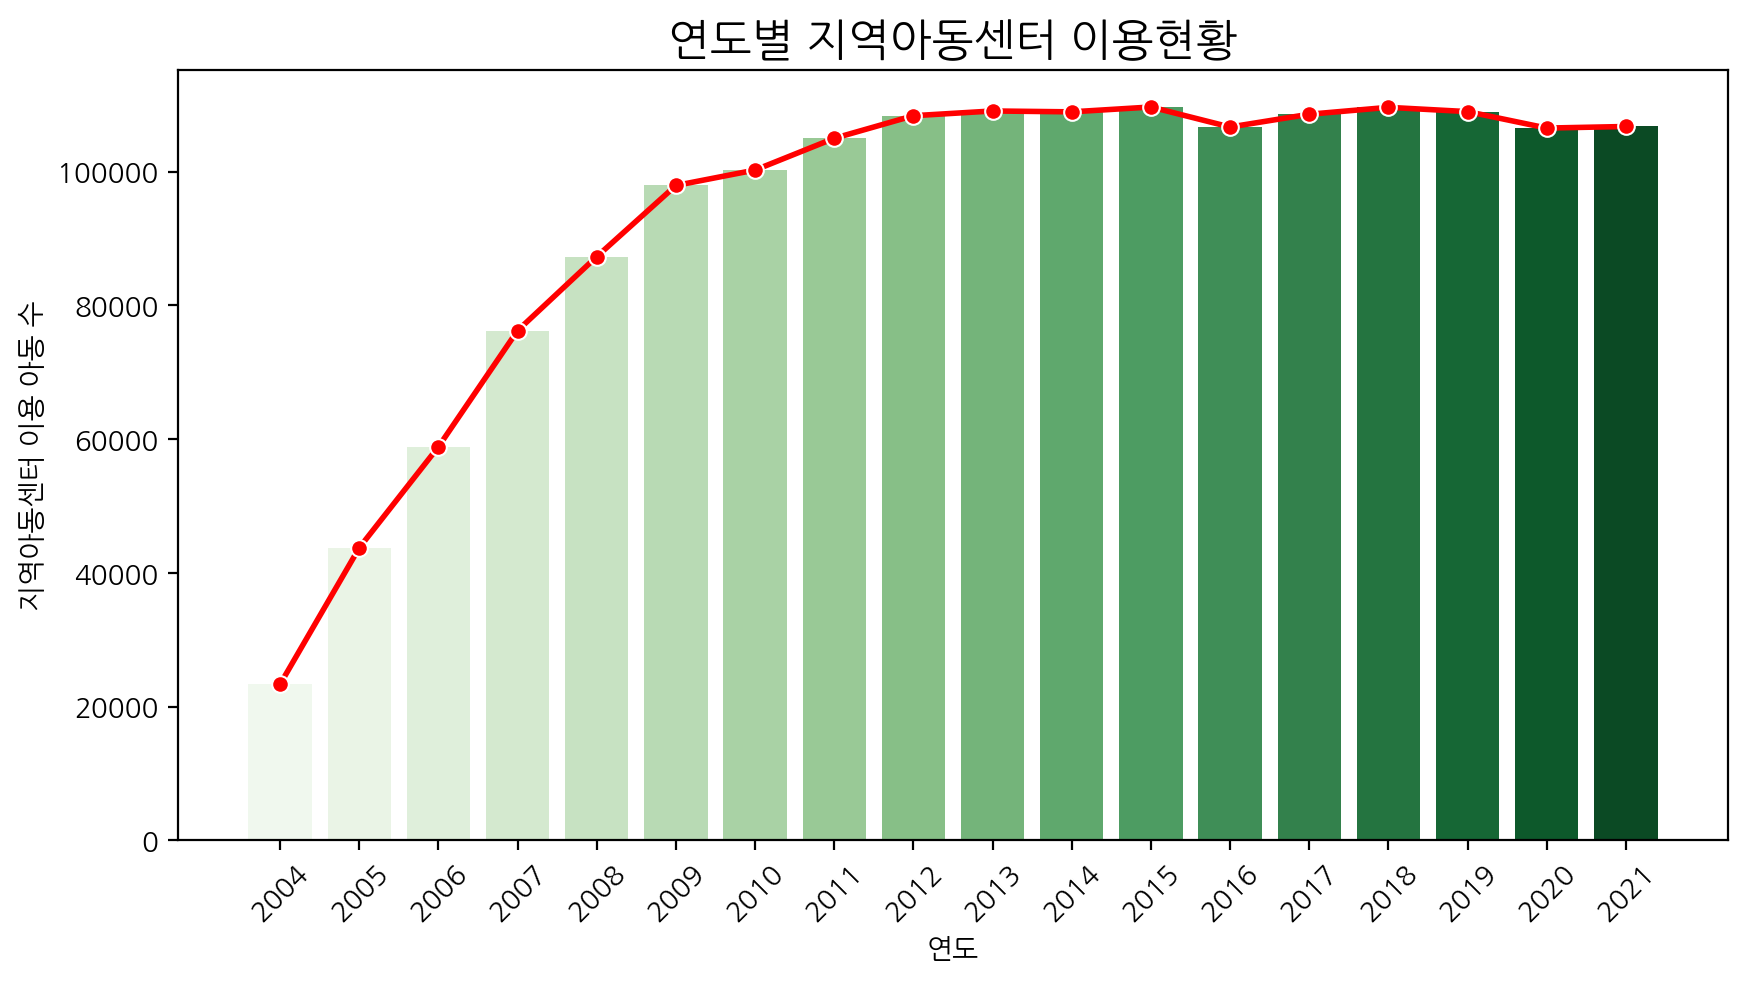

In [90]:
# 연도별 지역아동센터 수 시각화
data3["연도"] = data3["연도"].astype(str)

plt.figure(figsize=(10, 5))
plt.title("연도별 지역아동센터 이용현황", fontsize=16)
sns.barplot(x="연도", y="지역아동센터 이용 아동 수", data=data3, palette='Greens')
sns.lineplot(x="연도", y="지역아동센터 이용 아동 수", data=data3, marker='o', color='red', linewidth=2)
plt.xticks(rotation=45)
plt.show()

# data4 지역아동센터 지원 및 운영 현황

In [92]:
data4

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2022
연도,,,,,,,,,,,,,,
편성 개소(개소),2088.0,2788,2946.0,3260.0,3500.0,3742.0,3989.0,4113.0,4113.0,4113.0,4124.0,4135.0,4148.0,4261.0
"지원 단가\n(만원/월, 개소)",220.0,상: 220,320.0,370.0,395.0,420.0,433.0,443.0,458.0,473.0,516.0,529.0,569.0,644.0
NaN,NaN,하: 320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# 저 데이터 올린 사이트 보니까 2009 년 값을 평균으로 계산해서 올렸더라고. 그래서 동일하게 처리하겠음
data4 = data4.iloc[:, :14]  # 첫 번째 열과 2004~2021년까지의 데이터 선택
data4 = data4.transpose()  # 행과 열을 전환
data4.reset_index(inplace=True)  # 인덱스 초기화
data4

연도,index,편성 개소(개소),"지원 단가\n(만원/월, 개소)",NaN
0,2008,2088.0,220.0,NaN
1,2009,2788,상: 220,하: 320
2,2010,2946.0,320.0,NaN
3,2011,3260.0,370.0,NaN
4,2012,3500.0,395.0,NaN
5,2013,3742.0,420.0,NaN
6,2014,3989.0,433.0,NaN
7,2015,4113.0,443.0,NaN
8,2016,4113.0,458.0,NaN
9,2017,4113.0,473.0,NaN


In [94]:
data4.loc[1,'지원 단가\n(만원/월, 개소)'] = (220 +320) /2

In [95]:
data4.columns

Index(['index', '편성 개소(개소)', '지원 단가\n(만원/월, 개소)', nan], dtype='object', name='연도')

In [96]:
data4 = data4.dropna(axis=1, how='any')
data4['지원 단가\n(만원/월, 개소)'] = data4['지원 단가\n(만원/월, 개소)'].astype(int)
data4.columns=['연도','편성개소','지원단가(만원/월,개소)']
data4

,연도,편성개소,"지원단가(만원/월,개소)"
0,2008,2088.0,220
1,2009,2788,270
2,2010,2946.0,320
3,2011,3260.0,370
4,2012,3500.0,395
5,2013,3742.0,420
6,2014,3989.0,433
7,2015,4113.0,443
8,2016,4113.0,458
9,2017,4113.0,473


In [97]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   연도             14 non-null     int64 
 1   편성개소           14 non-null     object
 2   지원단가(만원/월,개소)  14 non-null     int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 412.0+ bytes


In [98]:
data4['편성개소'] = data4['편성개소'].astype(int)
data4['연도'] = data4['연도'].astype(str)

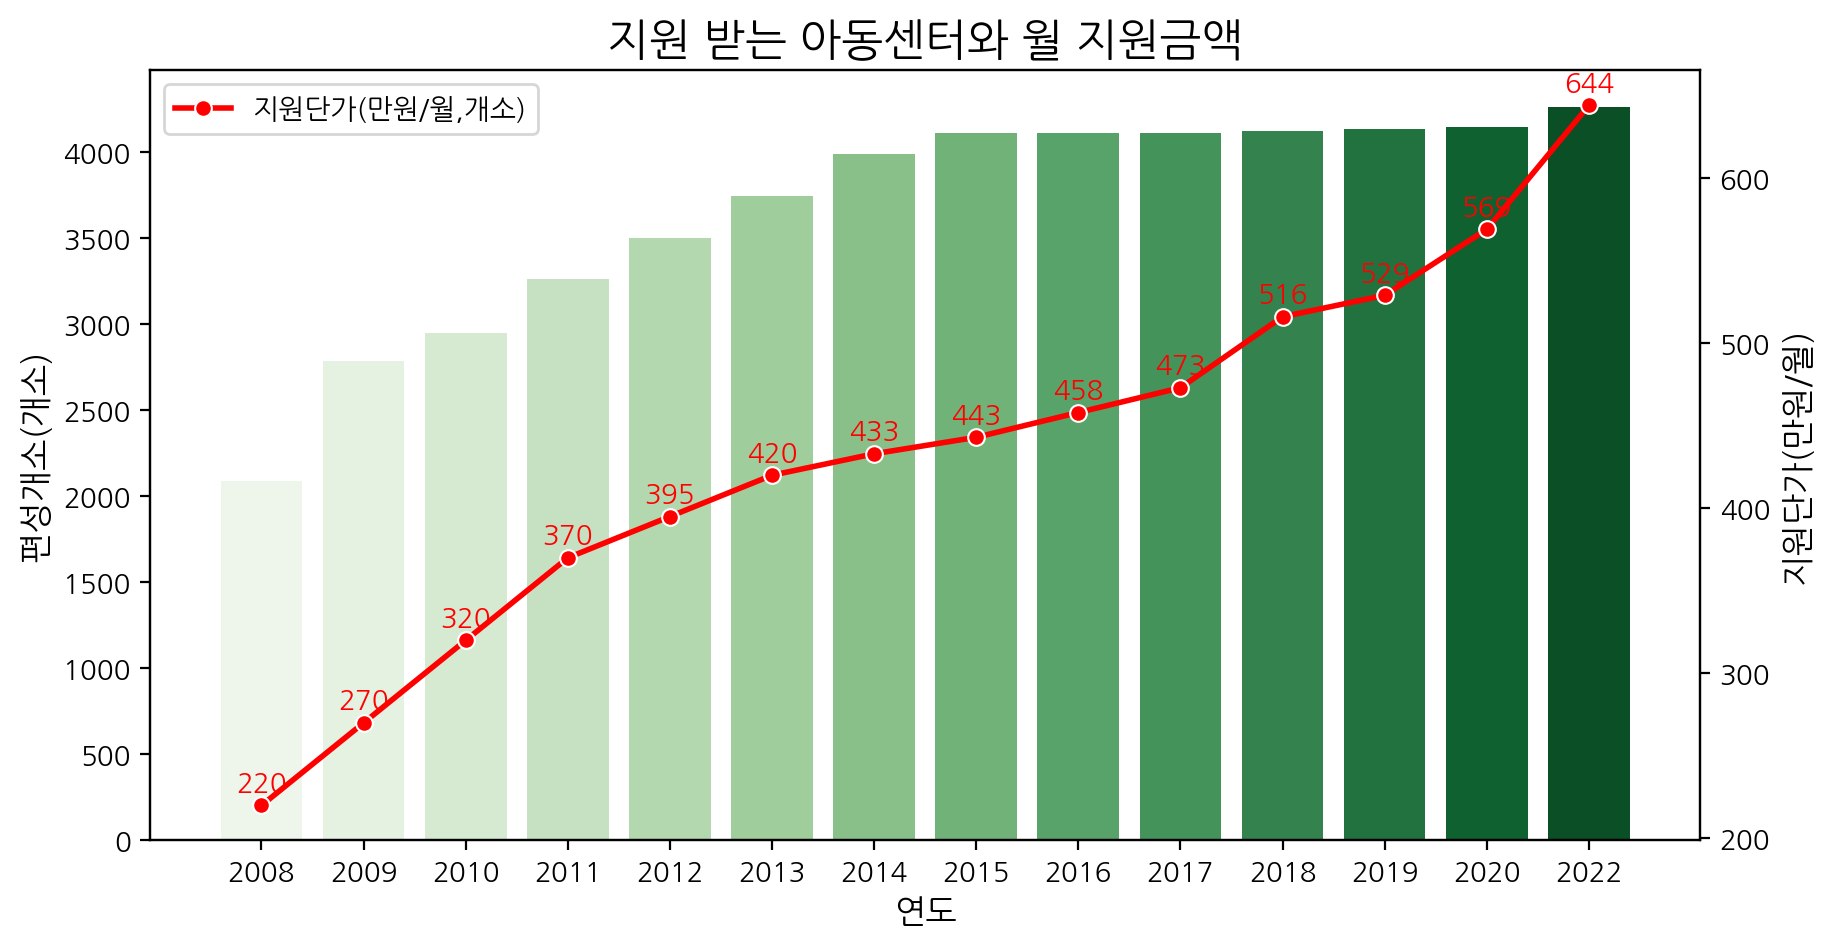

In [99]:
plt.figure(figsize=(10, 5))
plt.title("지원 받는 아동센터와 월 지원금액", fontsize=16)

# 첫 번째 Y축: 바 그래프 (편성 개소)
ax1 = sns.barplot(x="연도", y="편성개소", data=data4, palette='Greens')
ax1.set_ylabel("편성개소(개소)", fontsize=12)
ax1.set_xlabel("연도", fontsize=12)

# 두 번째 Y축: 선 그래프 (지원 단가)
ax2 = ax1.twinx()  # ax1과 x축을 공유하는 새로운 Y축 생성
sns.lineplot(x="연도", y="지원단가(만원/월,개소)", data=data4, marker='o', color='red', linewidth=2, label='지원단가(만원/월,개소)', ax=ax2)
ax2.set_ylabel("지원단가(만원/월)", fontsize=12)


for x, y in zip(data4["연도"], data4["지원단가(만원/월,개소)"]):
    ax2.annotate(f"{y:,}", xy=(x, y), xytext=(0, 5), textcoords="offset points", ha='center', fontsize=10, color='red')
    # annotate : 좌표위에 글 쓰는 함수  / xy=()이건 좌표 위치 / xytext는 xy에서 주어진 좌표기준 어디에 글 쓸 거냐.

# 범례 추가
ax2.legend(loc="upper left")

# X축 라벨 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()


# data5 이용아동 센터 현황

In [101]:
data5

,구분,시설수,일일이용아동_미취학,일일이용아동_초등학교저학년,일일이용아동_초등학교고학년,일일이용아동_중학생,일일이용아동_고등학생,일일이용아동_학교밖,일일이용아동_기타,종사자 현황_시설장,종사자 현황_생활복지사
0,2006,2029,4133,25149,21426,6846,1095,103,420.0,2019,2961
1,2007,2618,4127,32867,28177,9224,1413,104,317.0,2618,3440
2,2008,3013,4585,35972,33163,11380,1862,133,196.0,3013,3827
3,2009,3474,4838,39053,38032,13600,2072,331,NaN,3474,4310
4,2010,3690,4376,37865,40233,15075,2346,338,NaN,3690,4352
5,2011,3985,4578,37407,42324,17374,3014,285,NaN,3985,4646
6,2012,4036,4028,38030,42396,20017,3663,223,NaN,4036,4938
7,2013,4061,3714,39293,41025,20817,4006,211,NaN,4061,5121
8,2014,4059,3533,40425,40662,20121,4035,160,NaN,4059,5252
9,2015,4102,3133,42267,40113,19566,4418,164,NaN,4102,5313


In [102]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   구분              17 non-null     int64  
 1   시설수             17 non-null     int64  
 2   일일이용아동_미취학      17 non-null     int64  
 3   일일이용아동_초등학교저학년  17 non-null     int64  
 4   일일이용아동_초등학교고학년  17 non-null     int64  
 5   일일이용아동_중학생      17 non-null     int64  
 6   일일이용아동_고등학생     17 non-null     int64  
 7   일일이용아동_학교밖      17 non-null     int64  
 8   일일이용아동_기타       4 non-null      float64
 9   종사자 현황_시설장      17 non-null     int64  
 10  종사자 현황_생활복지사    17 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 1.6 KB


In [103]:
data5['구분'] = data5['구분'].astype(str)

미취학 (6세 이하) / 초등 저학년 (7-9세) / 초등 고학년 (10-12세) / 중학생 (12-15세) / 고등학생 (16세 이상)

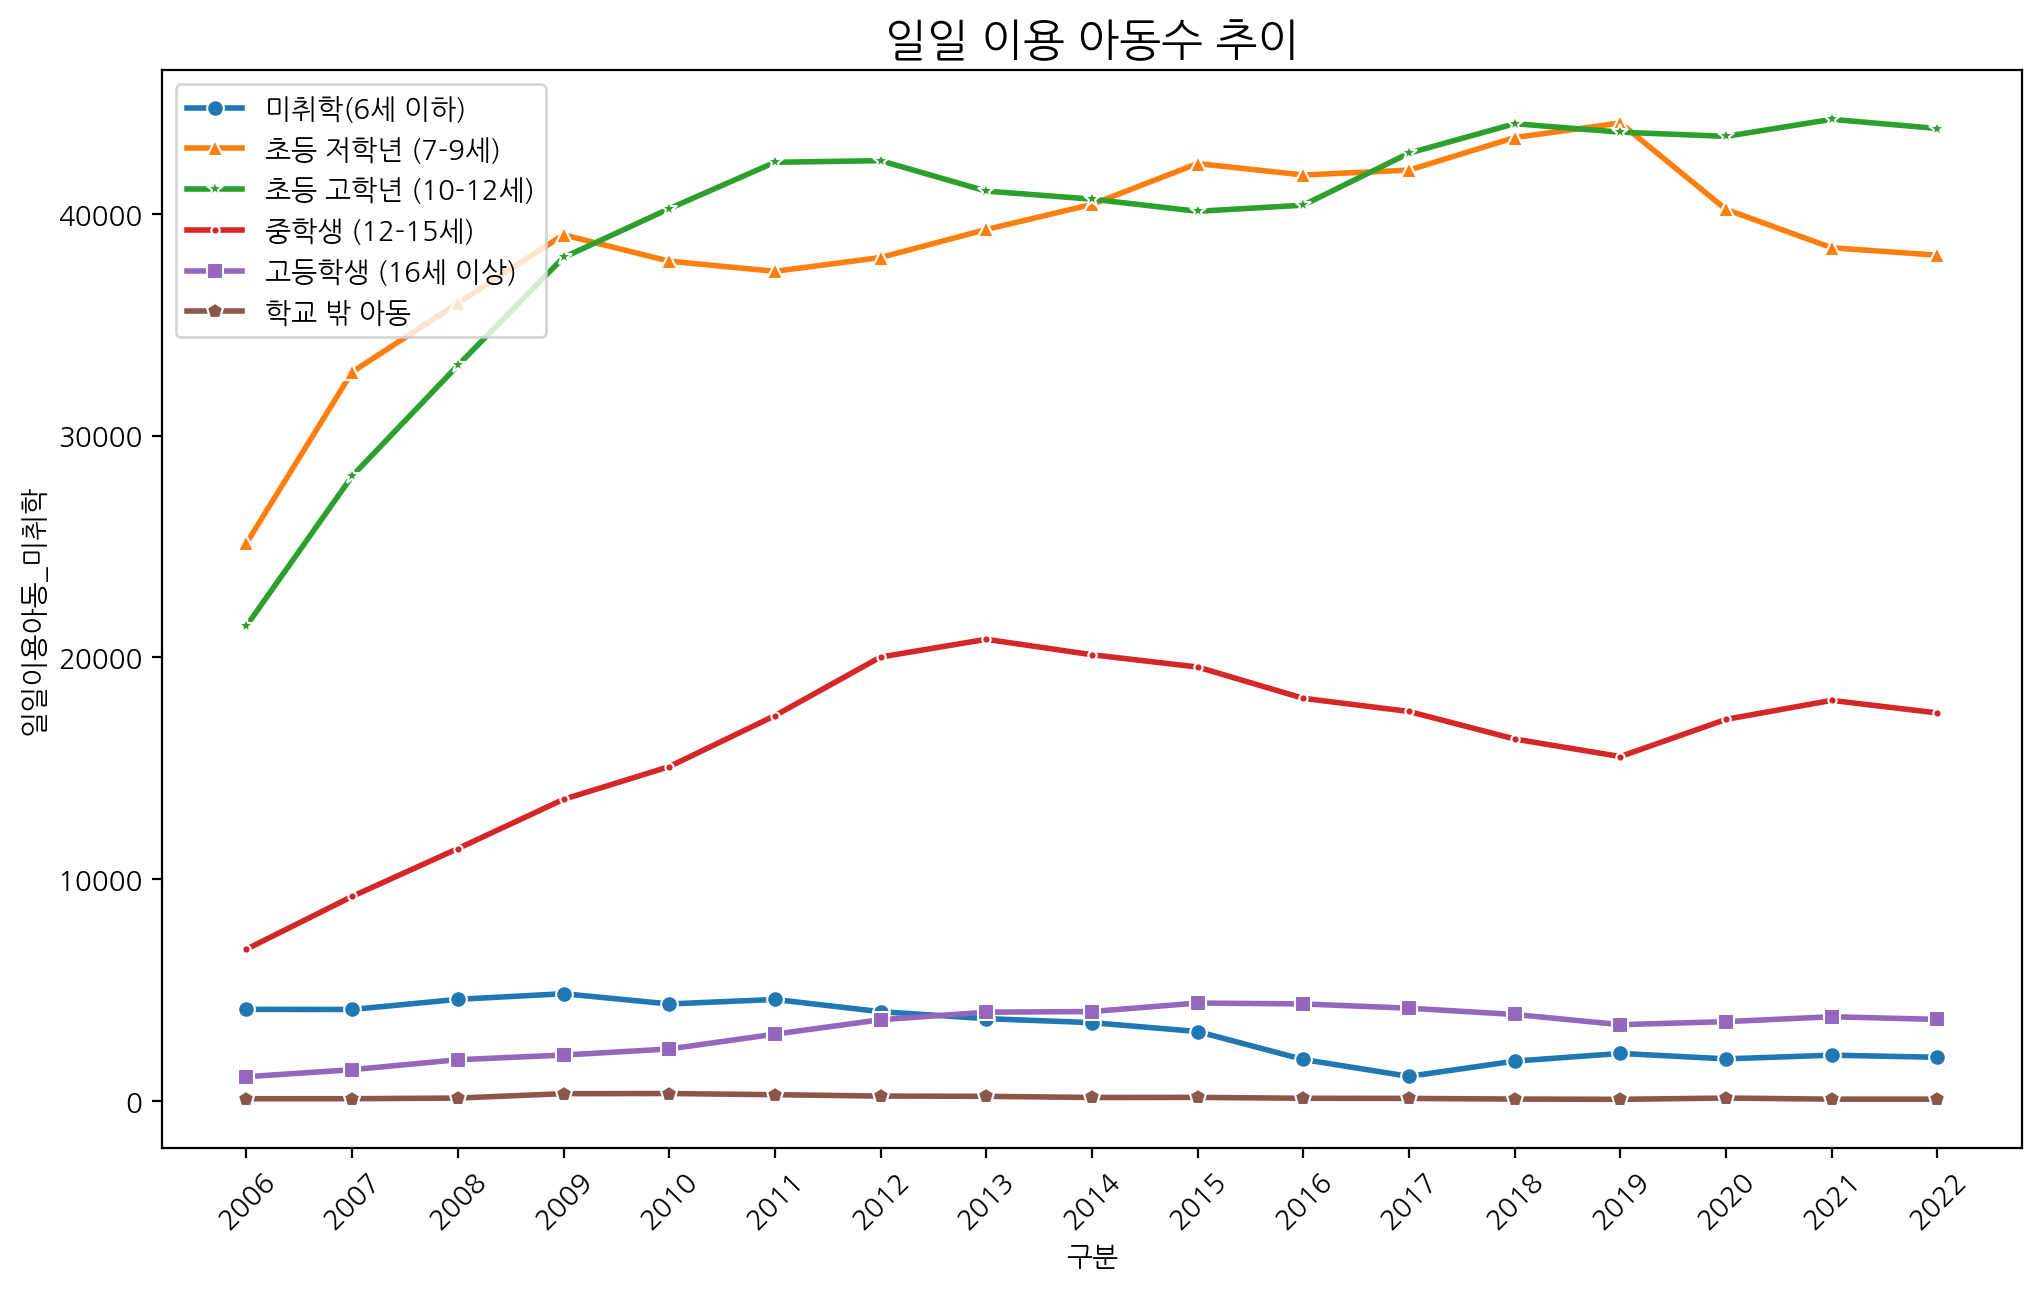

In [105]:
plt.figure(figsize=(12, 7))
plt.title("일일 이용 아동수 추이", fontsize=16)

sns.lineplot(x="구분", y="일일이용아동_미취학", data=data5, marker='o',  linewidth=2, label='미취학(6세 이하)')
sns.lineplot(x="구분", y="일일이용아동_초등학교저학년", data=data5, marker='^', linewidth=2, label='초등 저학년 (7-9세)')
sns.lineplot(x="구분", y="일일이용아동_초등학교고학년", data=data5, marker='*',  linewidth=2, label='초등 고학년 (10-12세)')
sns.lineplot(x="구분", y="일일이용아동_중학생", data=data5, marker='.', linewidth=2, label='중학생 (12-15세)')
sns.lineplot(x="구분", y="일일이용아동_고등학생", data=data5, marker='s',  linewidth=2, label='고등학생 (16세 이상)')
sns.lineplot(x="구분", y="일일이용아동_학교밖", data=data5, marker='p',  linewidth=2, label='학교 밖 아동')




# 범례 추가
plt.legend()

# X축 라벨 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

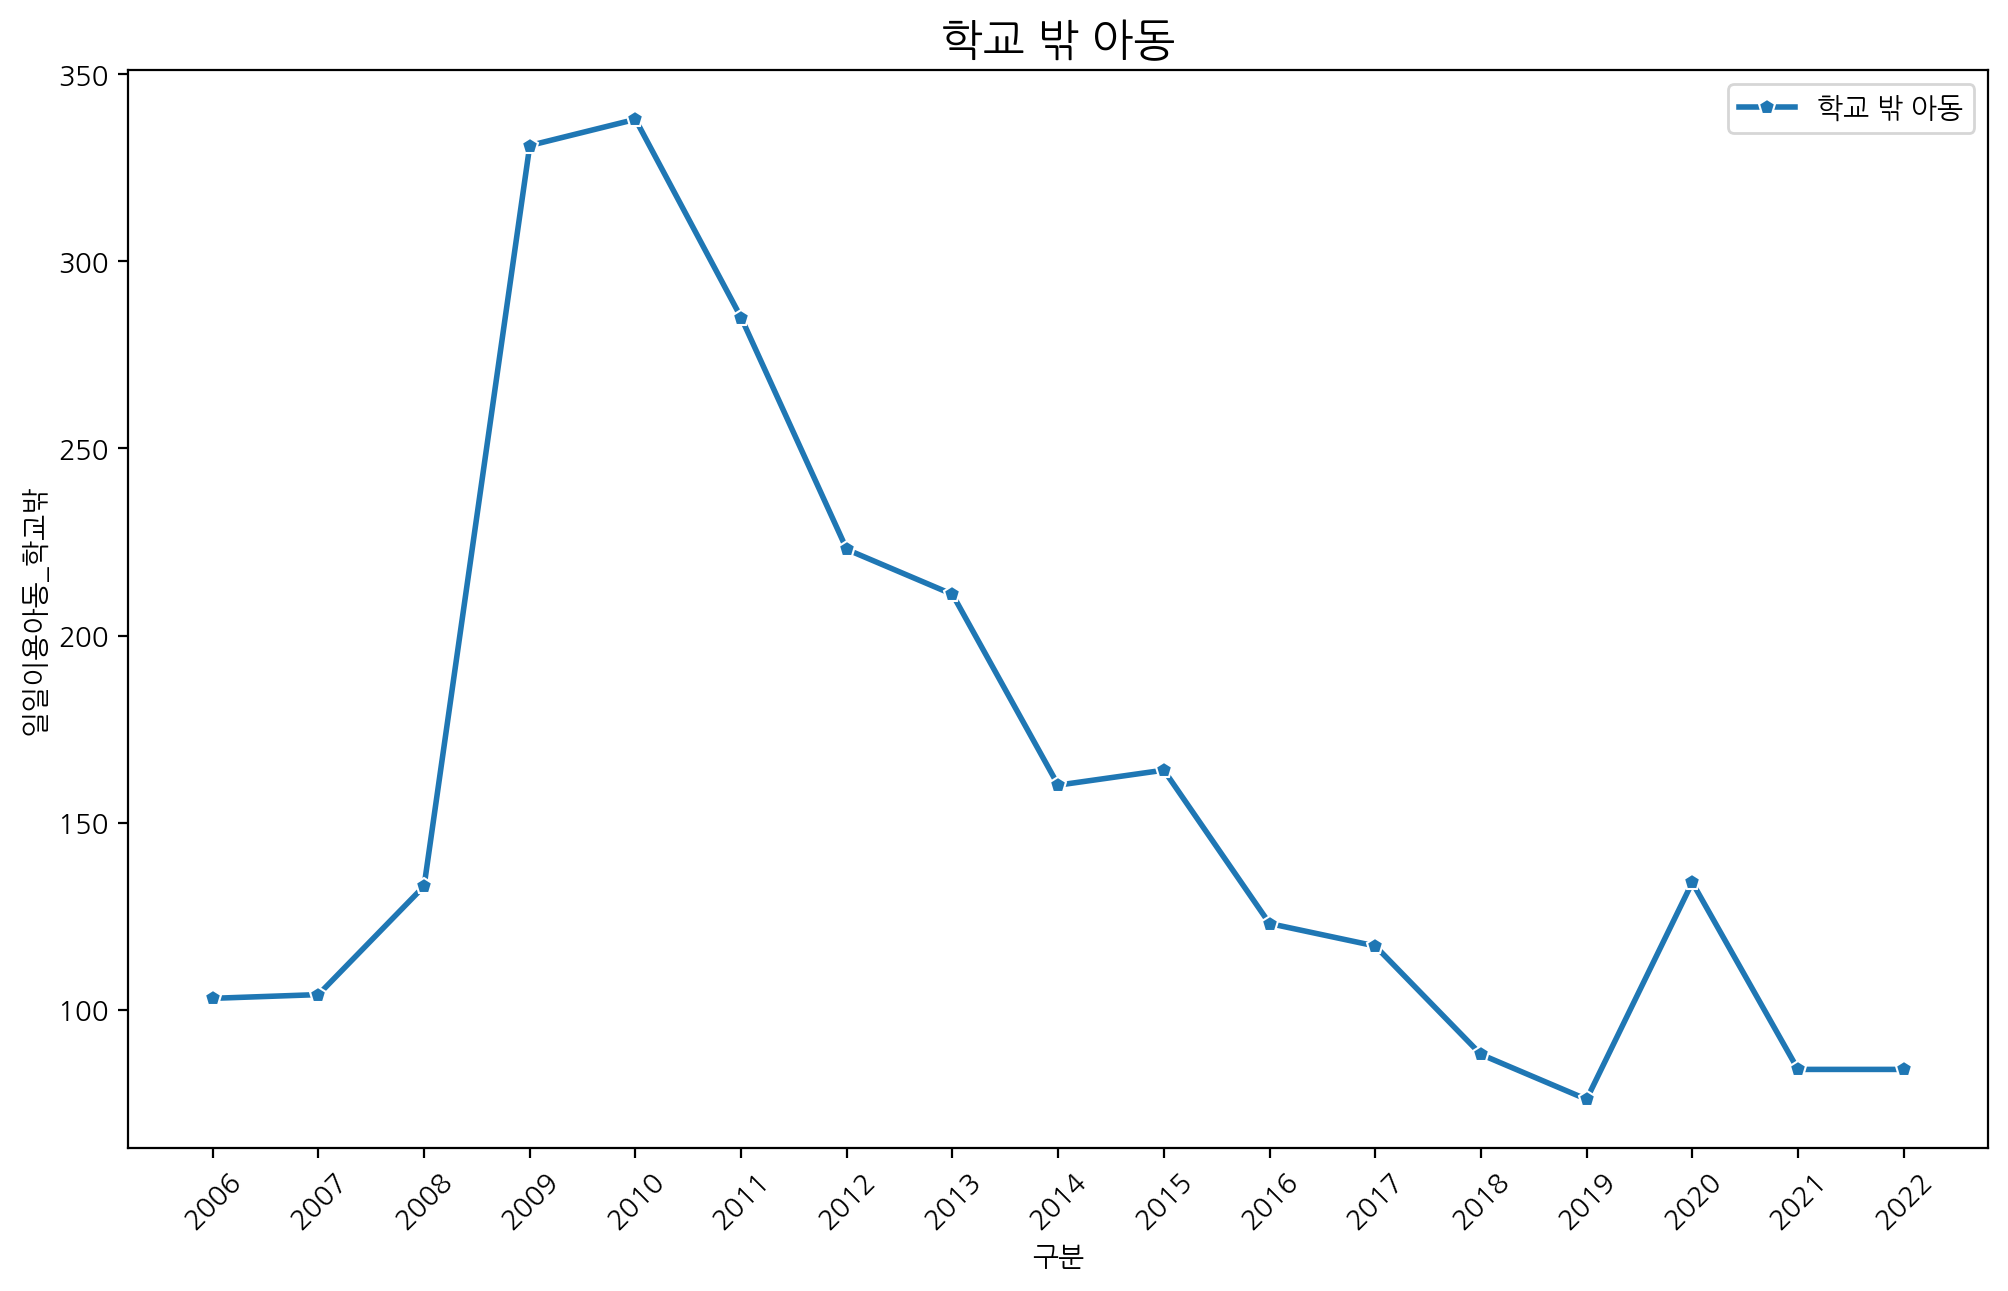

In [106]:
plt.figure(figsize=(12, 7))
plt.title("학교 밖 아동", fontsize=16)
sns.lineplot(x="구분", y="일일이용아동_학교밖", data=data5, marker='p',  linewidth=2, label='학교 밖 아동')
plt.xticks(rotation=45)
plt.legend()
plt.show()

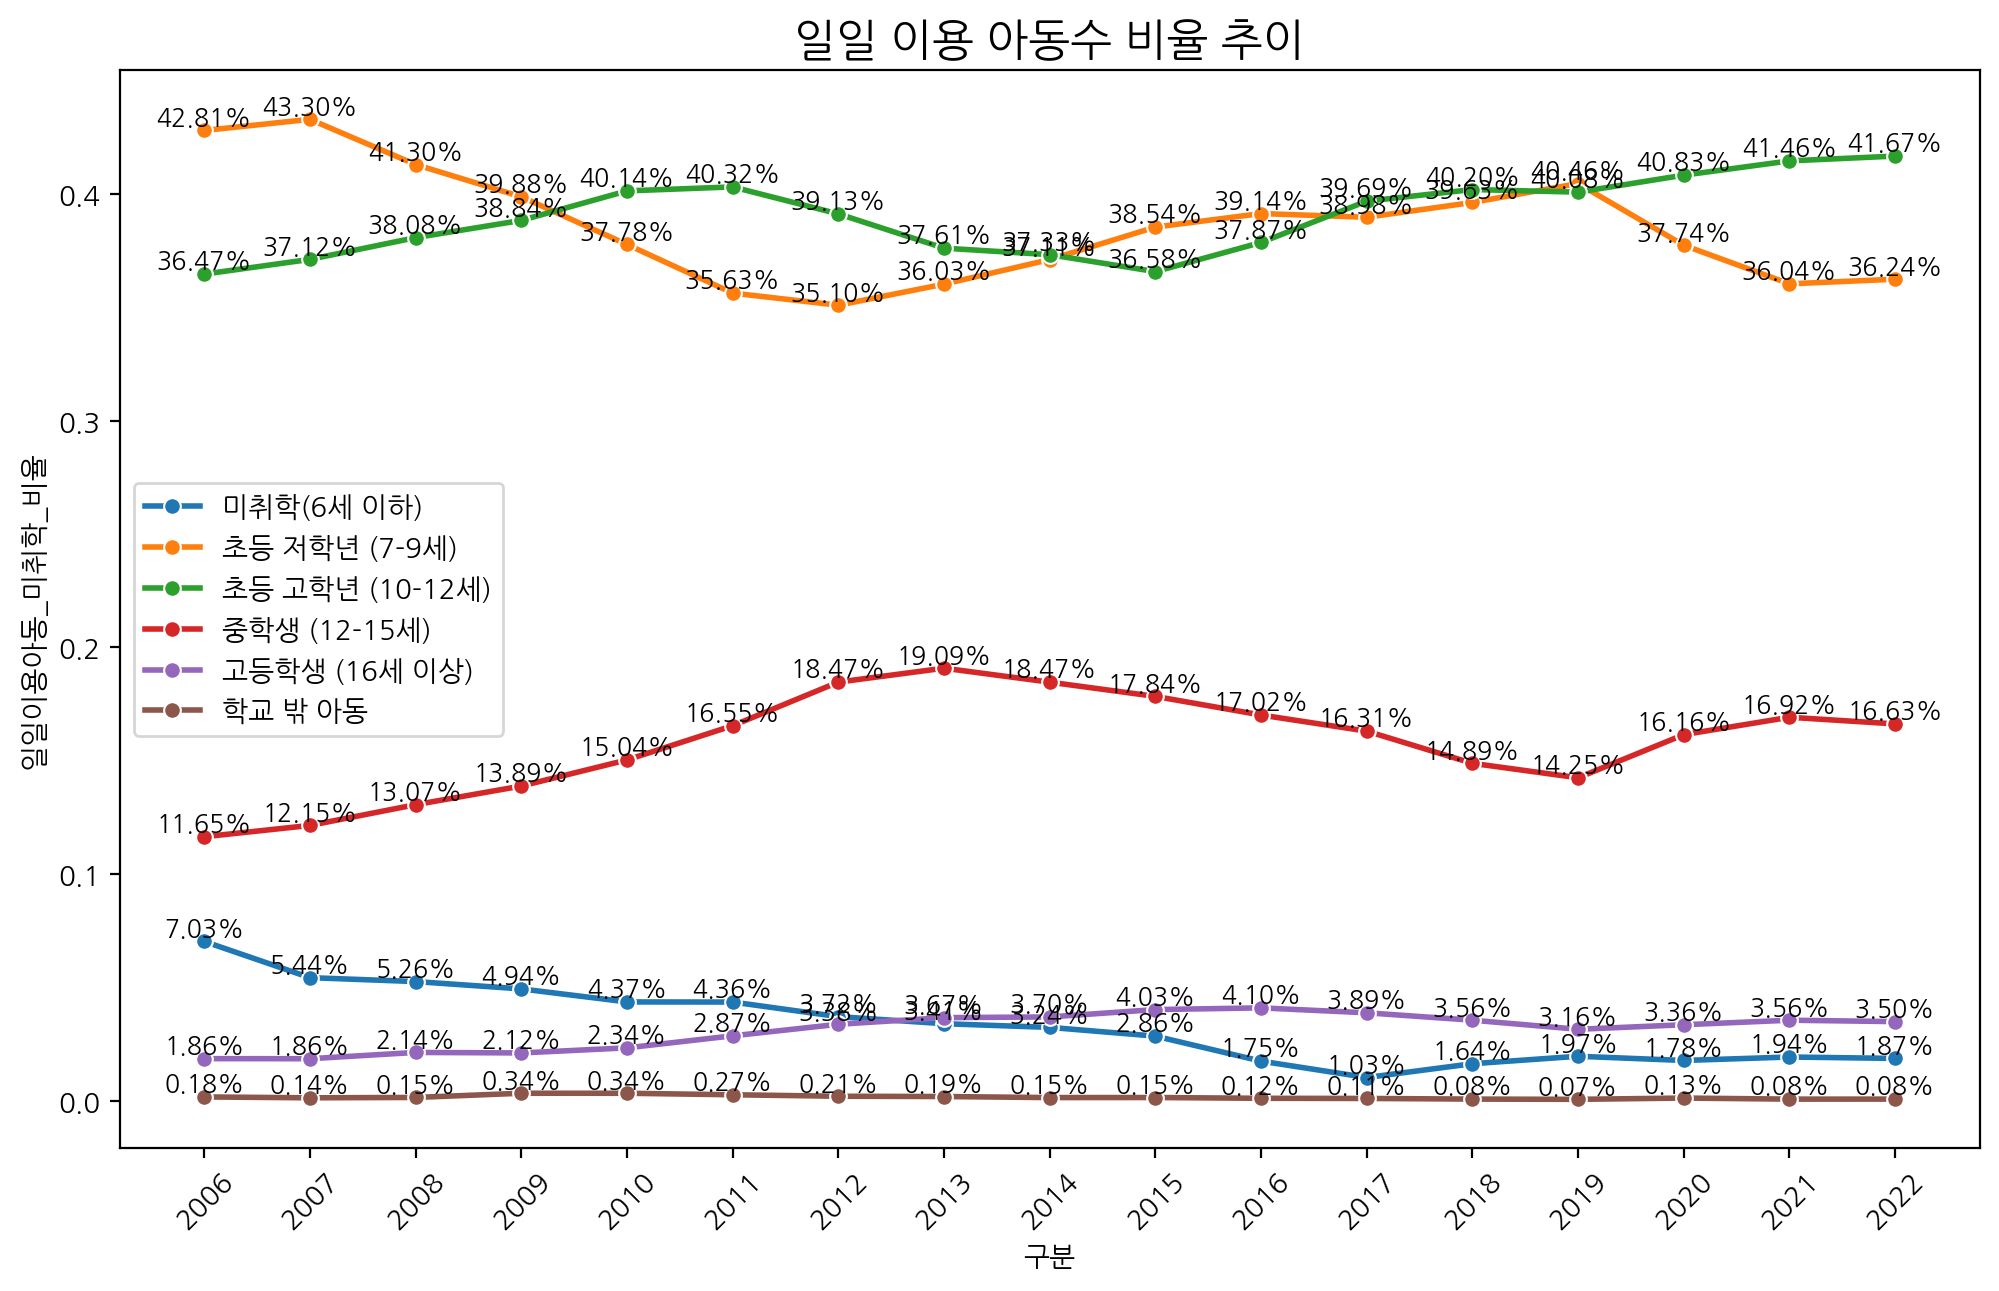

In [137]:
# 각 그룹의 비율 계산
data5['총아동수'] = data5[['일일이용아동_미취학', '일일이용아동_초등학교저학년', 
                           '일일이용아동_초등학교고학년', '일일이용아동_중학생', 
                           '일일이용아동_고등학생', '일일이용아동_학교밖']].sum(axis=1)

# 비율 계산
for column in ['일일이용아동_미취학', '일일이용아동_초등학교저학년', 
               '일일이용아동_초등학교고학년', '일일이용아동_중학생', 
               '일일이용아동_고등학생', '일일이용아동_학교밖']:
    data5[column + '_비율'] = data5[column] / data5['총아동수']

# 그래프 그리기
plt.figure(figsize=(12, 7))
plt.title("일일 이용 아동수 비율 추이", fontsize=16)

# 각 그룹에 대해 선 그래프 및 텍스트 추가
for column, label in zip(['일일이용아동_미취학', '일일이용아동_초등학교저학년', 
                          '일일이용아동_초등학교고학년', '일일이용아동_중학생', 
                          '일일이용아동_고등학생', '일일이용아동_학교밖'],
                         ['미취학(6세 이하)', '초등 저학년 (7-9세)', 
                          '초등 고학년 (10-12세)', '중학생 (12-15세)', 
                          '고등학생 (16세 이상)', '학교 밖 아동']):
    sns.lineplot(x="구분", y=column + '_비율', data=data5, marker='o', linewidth=2, label=label)
    
    # 각 점 위에 비율 값 추가
    for i in range(len(data5)):
        plt.text(data5['구분'][i], data5[column + '_비율'][i], 
                 f"{data5[column + '_비율'][i]:.2%}", 
                 fontsize=9, ha='center', va='bottom')

# 범례 추가
plt.legend()

# X축 라벨 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

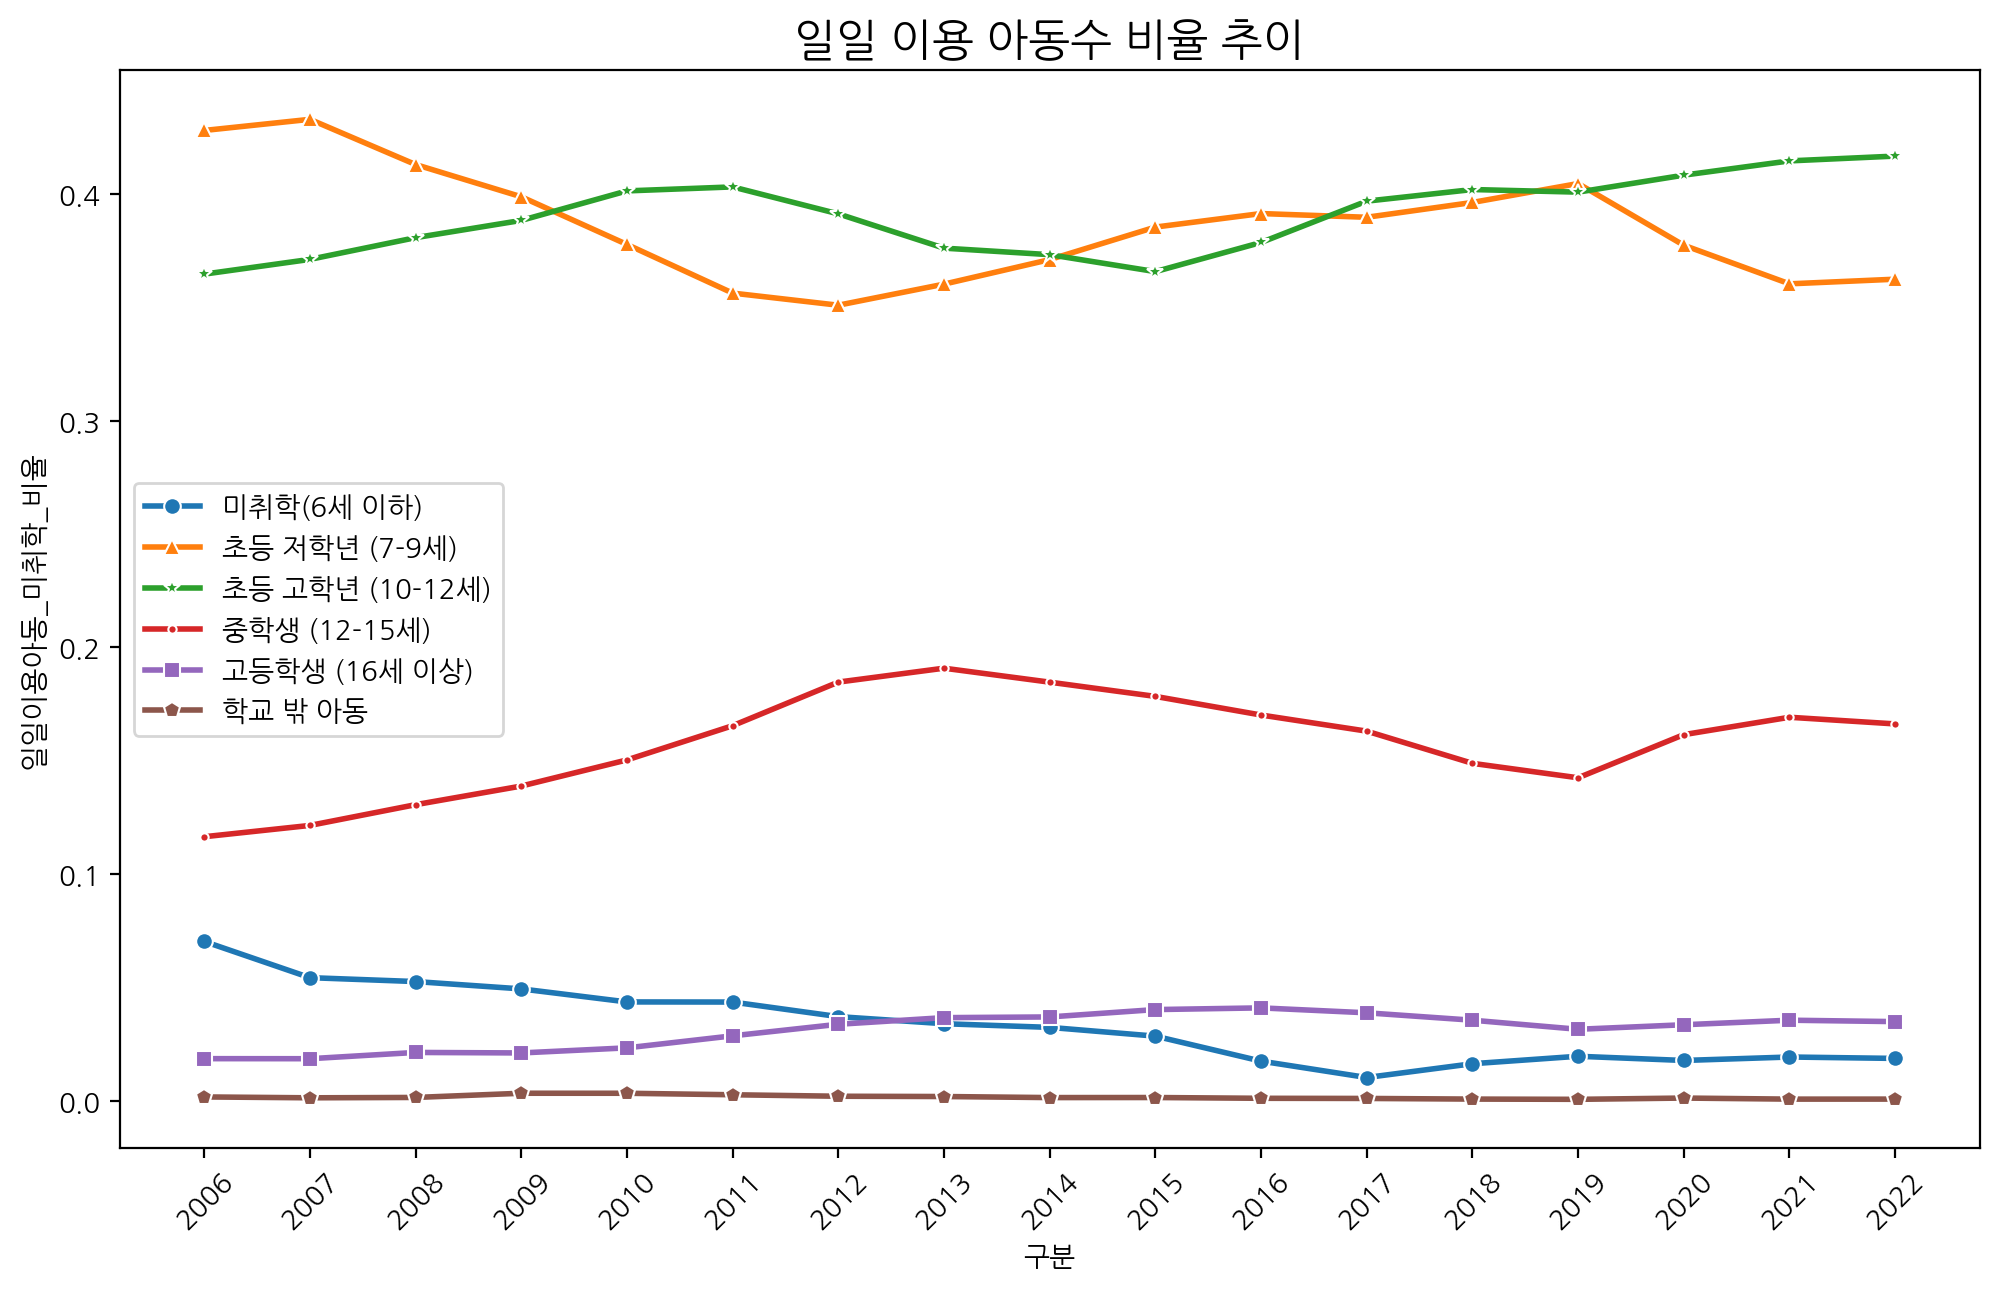

In [139]:
# 그래프 그리기
plt.figure(figsize=(12, 7))
plt.title("일일 이용 아동수 비율 추이", fontsize=16)

sns.lineplot(x="구분", y="일일이용아동_미취학_비율", data=data5, marker='o', linewidth=2, label='미취학(6세 이하)')
sns.lineplot(x="구분", y="일일이용아동_초등학교저학년_비율", data=data5, marker='^', linewidth=2, label='초등 저학년 (7-9세)')
sns.lineplot(x="구분", y="일일이용아동_초등학교고학년_비율", data=data5, marker='*', linewidth=2, label='초등 고학년 (10-12세)')
sns.lineplot(x="구분", y="일일이용아동_중학생_비율", data=data5, marker='.', linewidth=2, label='중학생 (12-15세)')
sns.lineplot(x="구분", y="일일이용아동_고등학생_비율", data=data5, marker='s', linewidth=2, label='고등학생 (16세 이상)')
sns.lineplot(x="구분", y="일일이용아동_학교밖_비율", data=data5, marker='p', linewidth=2, label='학교 밖 아동')

# 범례 추가
plt.legend()

# X축 라벨 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

In [141]:
data5

,구분,시설수,일일이용아동_미취학,일일이용아동_초등학교저학년,일일이용아동_초등학교고학년,일일이용아동_중학생,일일이용아동_고등학생,일일이용아동_학교밖,일일이용아동_기타,종사자 현황_시설장,종사자 현황_생활복지사,총아동수,일일이용아동_미취학_비율,일일이용아동_초등학교저학년_비율,일일이용아동_초등학교고학년_비율,일일이용아동_중학생_비율,일일이용아동_고등학생_비율,일일이용아동_학교밖_비율
0,2006,2029,4133,25149,21426,6846,1095,103,420.0,2019,2961,58752,0.070347,0.428054,0.364685,0.116524,0.018638,0.001753
1,2007,2618,4127,32867,28177,9224,1413,104,317.0,2618,3440,75912,0.054366,0.432962,0.371180,0.121509,0.018614,0.001370
2,2008,3013,4585,35972,33163,11380,1862,133,196.0,3013,3827,87095,0.052644,0.413020,0.380768,0.130662,0.021379,0.001527
3,2009,3474,4838,39053,38032,13600,2072,331,NaN,3474,4310,97926,0.049405,0.398801,0.388375,0.138880,0.021159,0.003380
4,2010,3690,4376,37865,40233,15075,2346,338,NaN,3690,4352,100233,0.043658,0.377770,0.401395,0.150400,0.023405,0.003372
5,2011,3985,4578,37407,42324,17374,3014,285,NaN,3985,4646,104982,0.043607,0.356318,0.403155,0.165495,0.028710,0.002715
6,2012,4036,4028,38030,42396,20017,3663,223,NaN,4036,4938,108357,0.037173,0.350969,0.391262,0.184732,0.033805,0.002058
7,2013,4061,3714,39293,41025,20817,4006,211,NaN,4061,5121,109066,0.034053,0.360268,0.376148,0.190866,0.036730,0.001935
8,2014,4059,3533,40425,40662,20121,4035,160,NaN,4059,5252,108936,0.032432,0.371089,0.373265,0.184705,0.037040,0.001469
9,2015,4102,3133,42267,40113,19566,4418,164,NaN,4102,5313,109661,0.028570,0.385433,0.365791,0.178423,0.040288,0.001496


In [143]:
# 각 비율의 평균 계산
비율_평균 = {}
for column in ['일일이용아동_미취학', '일일이용아동_초등학교저학년', 
               '일일이용아동_초등학교고학년', '일일이용아동_중학생', 
               '일일이용아동_고등학생', '일일이용아동_학교밖']:
    비율_평균[column] = data5[column + '_비율'].mean()

# 평균 출력
for key, value in 비율_평균.items():
    print(f"{key}: {value:.2%}")

일일이용아동_미취학: 3.33%
일일이용아동_초등학교저학년: 38.57%
일일이용아동_초등학교고학년: 39.02%
일일이용아동_중학생: 15.79%
일일이용아동_고등학생: 3.12%
일일이용아동_학교밖: 0.16%
